In [1]:
from astropy.io import fits
import numpy as np

with fits.open('hlsp_hugs_hst_acs-wfc_ngc6397_f606w_v1_stack-0015s.fits') as hdul:
    hdul.info()
    data = hdul[0].data
print(data)

Filename: hlsp_hugs_hst_acs-wfc_ngc6397_f606w_v1_stack-0015s.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   (10000, 10000)   float32   
[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]


<function matplotlib.pyplot.show(close=None, block=None)>

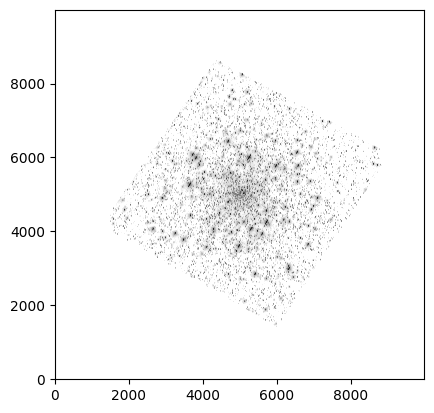

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(data, origin ='lower', cmap='Greys' , norm= LogNorm())
plt.colorbar
plt.show

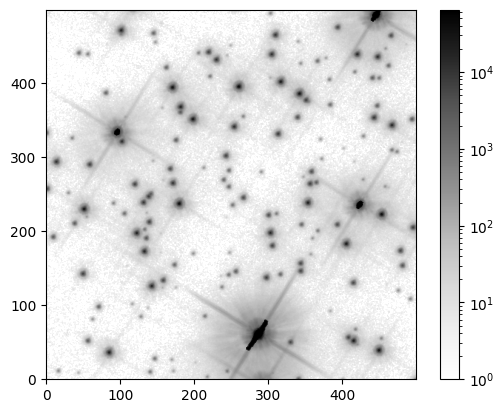

In [3]:
s1 = data[4000:4500, 4000:4500]
plt.figure()
plt.imshow(s1, origin='lower', cmap='Greys', norm=LogNorm())
plt.colorbar()
plt.show()

In [4]:
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats

mean,median ,std = sigma_clipped_stats(s1, sigma=3)
print(mean,median,std)



8.8305435 6.0 10.273605


In [5]:
from photutils.detection import DAOStarFinder

daofind = DAOStarFinder(fwhm=3, threshold= 5*std)
print(daofind)

sources = daofind(s1-median)

for col in sources.colnames:
    if col not in ('id','npix'):
        sources[col].info.format ='%.2f'

sources.pprint(max_width = 760)

print (sources.colnames)

 id xcentroid ycentroid sharpness roundness1 roundness2 npix sky    peak     flux   mag 
--- --------- --------- --------- ---------- ---------- ---- ---- -------- ------- -----
  1    340.82      0.31      0.92      -0.28      -0.66   25 0.00  2381.00   30.65 -3.72
  2    250.65      1.53      0.29      -0.05      -0.76   25 0.00   153.00    1.50 -0.44
  3    289.48      1.23      0.24      -0.15      -0.91   25 0.00   521.00    4.90 -1.73
  4    217.55      2.52      0.47       0.57      -0.03   25 0.00   263.00    4.06 -1.52
  5     43.54      8.02      0.50      -0.06      -0.09   25 0.00    78.00    1.41 -0.37
  6    305.30      7.79      0.57       0.10      -0.03   25 0.00   280.00    1.93 -0.72
  7    140.28      9.21      0.64       0.26      -0.04   25 0.00   769.00   11.33 -2.64
  8    171.83     10.42      0.54      -0.07       0.04   25 0.00   129.00    1.89 -0.69
  9    244.66     10.29      0.44       0.20      -0.12   25 0.00   727.00   11.71 -2.67
 10     16.40     10.

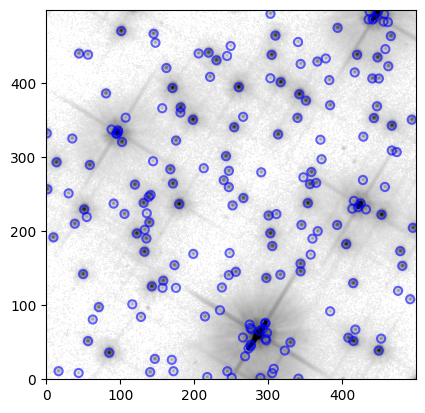

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from photutils.aperture import CircularAperture
from matplotlib.colors import LogNorm

position = np.transpose((sources['xcentroid'], sources['ycentroid']))
aperture = CircularAperture(position, r = 5.50)


aperture.plot(color= 'blue', lw= 1.5, alpha =0.6)
plt.imshow(s1, origin= 'lower', cmap= 'Greys', norm= LogNorm())


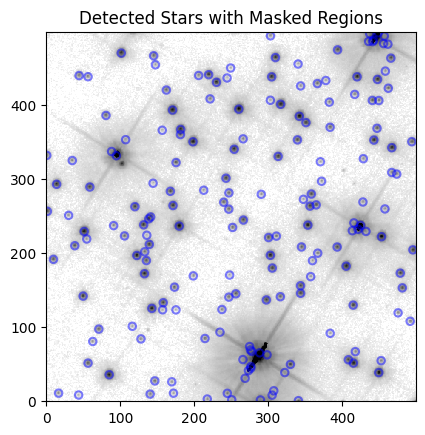

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from photutils.aperture import CircularAperture
from matplotlib.colors import LogNorm

# Assuming 's1' is the image data
# Create a boolean mask of the same shape as 's1'
mask = np.zeros(s1.shape, dtype=bool)  # Step 1: All pixels set to False

# Step 2: Mask specific regions (we set them to True)
mask[50:80, 290:300] = True  # Mask a rectangular region
mask[300:350, 95:110] = True  # Mask another region

# Step 3: Apply DAOStarFinder, ignoring masked pixels
sources = daofind(s1 - median, mask=mask)

# Step 4: Extract star positions
npix = sources['xcentroid']  # X-coordinates of detected stars
ypix = sources['ycentroid']  # Y-coordinates of detected stars

# Step 5: Fix np.transpose syntax
positions = np.transpose((npix, ypix))  # Corrected syntax for 2D array

# Step 6: Create circular apertures for detected stars
apertures = CircularAperture(positions, r=5)  # r=5 is the radius

# Step 7: Plot the image and overlay detected stars
plt.imshow(s1, origin='lower', cmap='Greys', norm=LogNorm(), interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)  # Overlay apertures
plt.title("Detected Stars with Masked Regions")
plt.show()
